# Performing maximum likelihood estimation

In [ ]:
install.packages("dplyr") # install packages

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("MASS") # install packages

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("smfsb") #intsall packages

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘abind’




In [ ]:
install.packages("ramcmc") #insatll packages

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#traceplot(fit1, pars = c("mu", "tau"), inc_warmup = TRUE, nrow = 2)

In [ ]:
install.packages(c("StanHeaders", "rstan", "rstanarm"), type = "source") #install packages for Rstan

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘lazyeval’, ‘plyr’, ‘tensorA’, ‘distributional’, ‘httpuv’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘htmlwidgets’, ‘miniUI’, ‘crosstalk’, ‘zoo’, ‘igraph’, ‘checkmate’, ‘matrixStats’, ‘ggridges’, ‘posterior’, ‘reshape2’, ‘minqa’, ‘nloptr’, ‘shiny’, ‘colourpicker’, ‘DT’, ‘dygraphs’, ‘gtools’, ‘markdown’, ‘shinyjs’, ‘shinythemes’, ‘threejs’, ‘xtable’, ‘xts’, ‘RcppParallel’, ‘RcppEigen’, ‘inline’, ‘gridExtra’, ‘loo’, ‘BH’, ‘bayesplot’, ‘lme4’, ‘rstantools’, ‘shinystan’




In [ ]:
install.packages("ggplot2") # install package for plotting

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Warning message in readLines(file, warn = TRUE):
“incomplete final line found on '/content/DSA_mcmc.stan'”


$summary
               mean      se_mean           sd          2.5%           25%
beta   2.822856e-01 7.932207e-05 3.530970e-03  2.751935e-01  2.799157e-01
gamma  2.460974e-01 7.387448e-05 3.298547e-03  2.397208e-01  2.438279e-01
rho    3.605722e-03 2.790641e-06 1.218414e-04  3.376461e-03  3.520958e-03
R0     1.147075e+00 1.097676e-04 5.454838e-03  1.136446e+00  1.143468e+00
N      2.776538e+02 2.143388e-01 9.388997e+00  2.599858e+02  2.711065e+02
c      1.017521e-03 5.533882e-07 2.625035e-05  9.681670e-04  9.990451e-04
lp__  -4.457923e+04 3.341044e-02 1.252483e+00 -4.458244e+04 -4.457981e+04
                50%           75%         97.5%    n_eff      Rhat
beta   2.822660e-01  2.846485e-01  2.890225e-01 1981.527 1.0023884
gamma  2.461049e-01  2.483730e-01  2.526507e-01 1993.685 1.0027975
rho    3.603456e-03  3.688587e-03  3.846363e-03 1906.259 1.0035282
R0     1.147142e+00  1.150646e+00  1.158048e+00 2469.538 0.9999494
N      2.775114e+02  2.840136e+02  2.961681e+02 1918.832 1.00351

ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



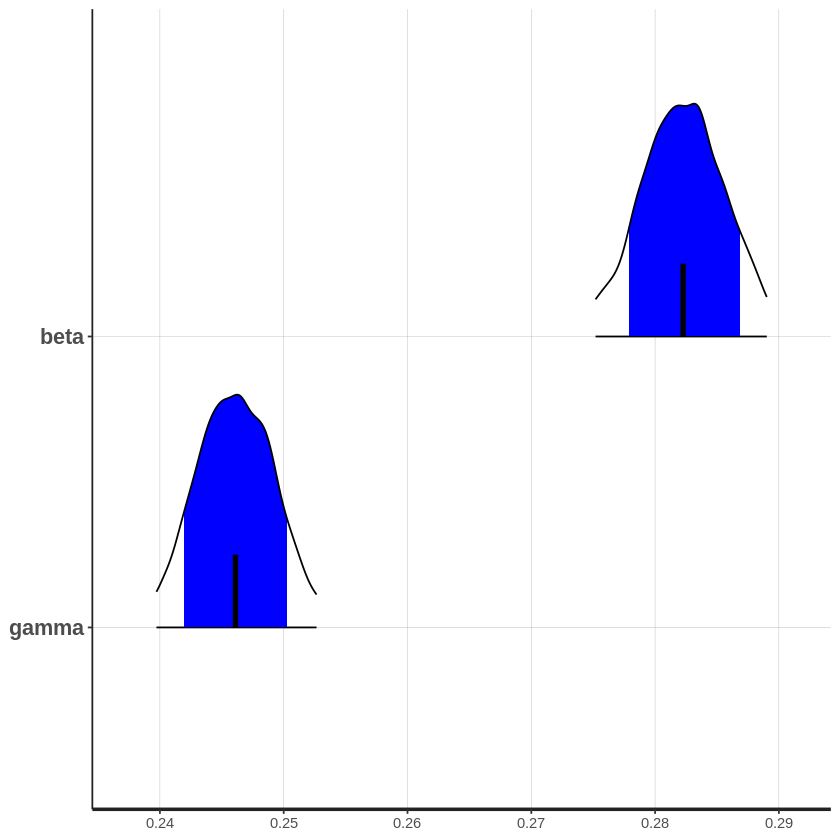

In [ ]:
################################################################################
################################################################################

### Needed libraries ###

library(rstan)                    # Stan MCMC package
rstan_options(auto_write = TRUE)
set.seed(1247)                    # Fixed seed for repoducibility                         

################################################################################

### Input and format data 

file.name= "First_Wave_table1.csv"   #input data
							
data<-read.csv(file.name);       
data=data[,-1]							
data=data[order(data[,1]),]
T=max(data[,1])
k=length(data[,1])
not.censored=ifelse(data[,2]<=T,1,0) # Check for data censoring  
data[,2]=pmin(T,data[,2])

data_SIR<-list(k=k,t0=0,ti=data[,1],Ti=data[,2],event=not.censored)

##############################################################################

### MCMC fit using  STAN library 

fit <- stan(
   file = "DSA_mcmc.stan",  # Stan program
   data = data_SIR,        # named list of data
   chains = 2,             # number of Markov chains
   warmup = 1000,          # number of warmup iterations per chain
   iter = 3000,            # total number of iterations per chain
   cores = 2,              # number of cores
   refresh = 1000,         # show progress every 'refresh' iterations
   control=list(adapt_delta=.9) )

#############################################################################

### output to device  

print(summary(fit))           # output fit summary stats 

                              # output  posterior densities 
print(plot(fit, show_density=T,pars=c("beta","gamma"),
           include=TRUE,fill_color="blue")) 

 ### save final samples to file

out.fit = as.data.frame(cbind(extract(fit)$gamma,
      extract(fit)$beta,extract(fit)$rho,extract(fit)$lp__ ))
colnames(out.fit) = c("gamma","beta","rho","lp")


write.csv(out.fit,paste0("MCMC_Samples_",file.name),row.names=F,col.names=NULL)



In [ ]:
print(summary(fit))

$summary
               mean      se_mean           sd          2.5%           25%
beta   2.822667e-01 7.613349e-05 3.417299e-03  2.758744e-01  2.799089e-01
gamma  2.460938e-01 6.983865e-05 3.233584e-03  2.399309e-01  2.438575e-01
rho    3.604313e-03 2.674589e-06 1.194501e-04  3.371810e-03  3.524719e-03
R0     1.147017e+00 1.047960e-04 5.580432e-03  1.136103e+00  1.143237e+00
N      2.777503e+02 2.062212e-01 9.213728e+00  2.601654e+02  2.713290e+02
c      1.017071e-03 5.175819e-07 2.574885e-05  9.663025e-04  9.998634e-04
lp__  -4.457919e+04 3.507651e-02 1.278842e+00 -4.458263e+04 -4.457973e+04
                50%           75%         97.5%    n_eff     Rhat
beta   2.821998e-01  2.846170e-01  2.889547e-01 2014.719 1.002219
gamma  2.460452e-01  2.482356e-01  2.524996e-01 2143.763 1.002238
rho    3.601591e-03  3.685563e-03  3.843709e-03 1994.614 1.001142
R0     1.147122e+00  1.150773e+00  1.157770e+00 2835.610 1.000224
N      2.776551e+02  2.837105e+02  2.965766e+02 1996.200 1.001171
c  

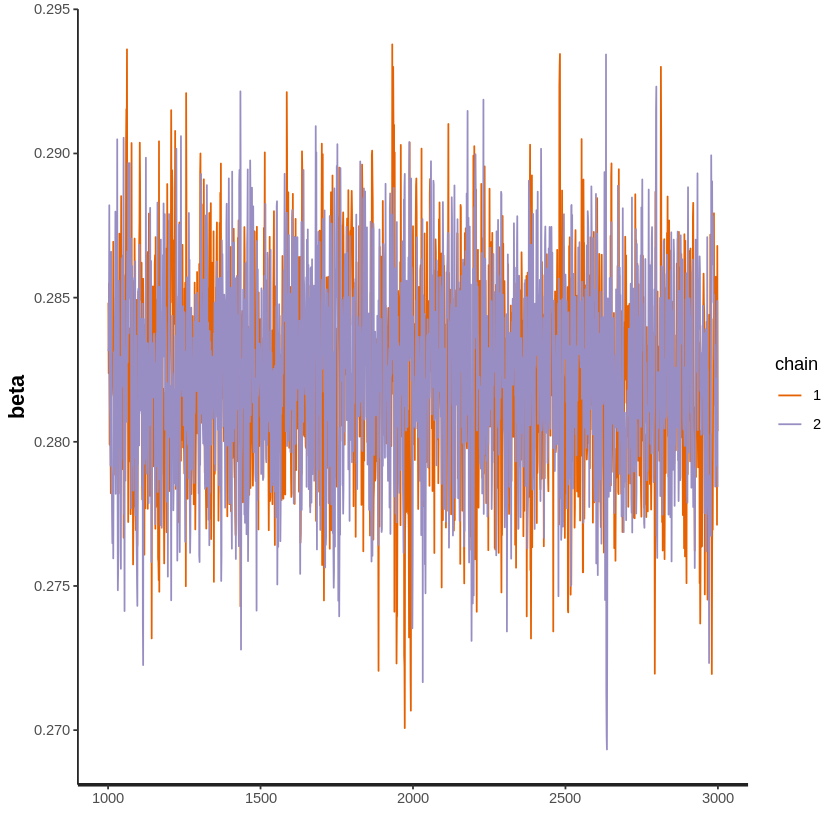

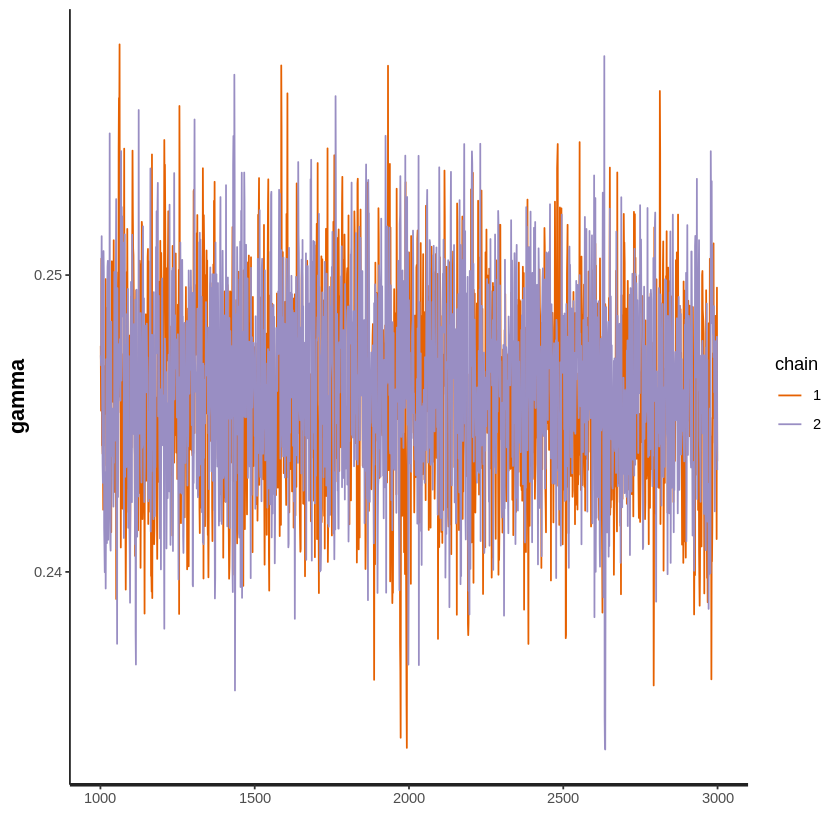

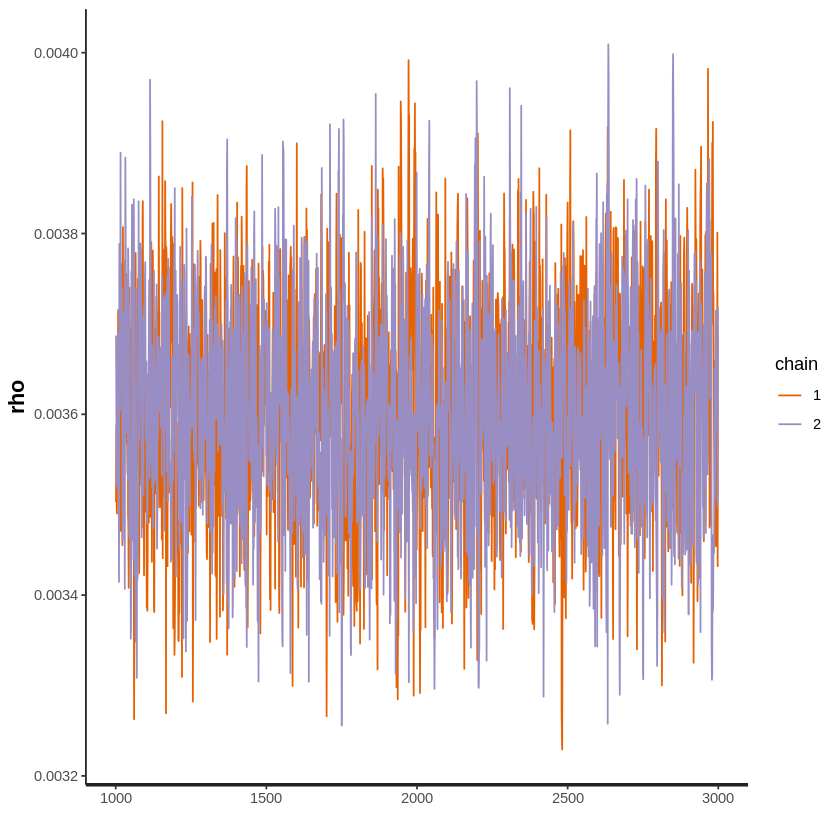

In [ ]:
traceplot(fit, "beta")
traceplot(fit, "gamma")
traceplot(fit, "rho")


In [ ]:
beta_sample <- extract(fit)$beta
gamma_sample <- extract(fit)$gamma 
rho_sample <- extract(fit)$rho
R0_sample <- extract(fit)$R0


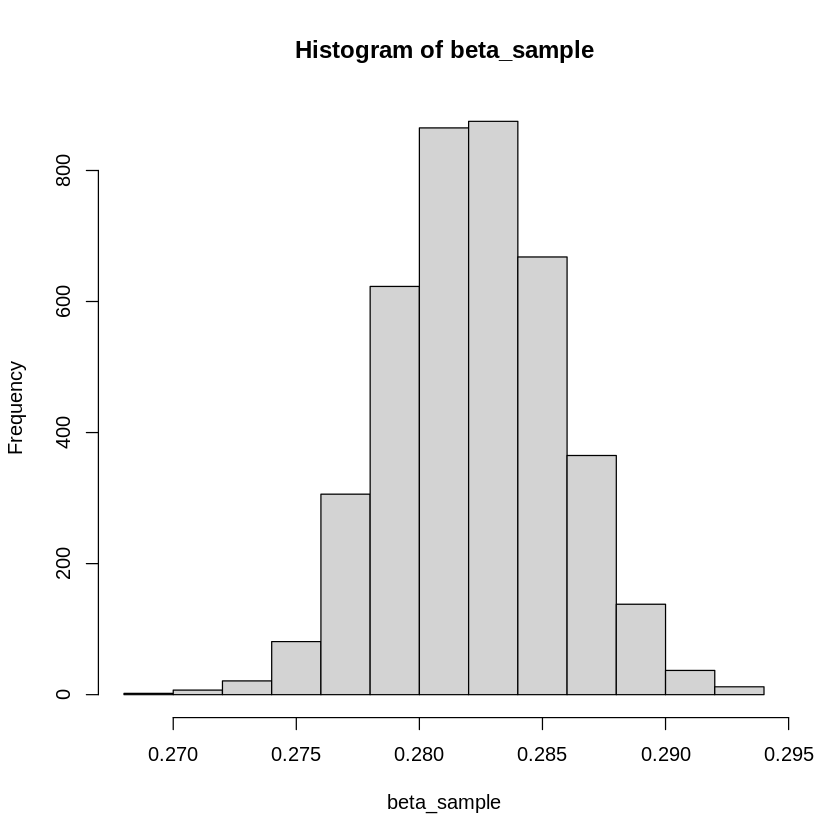

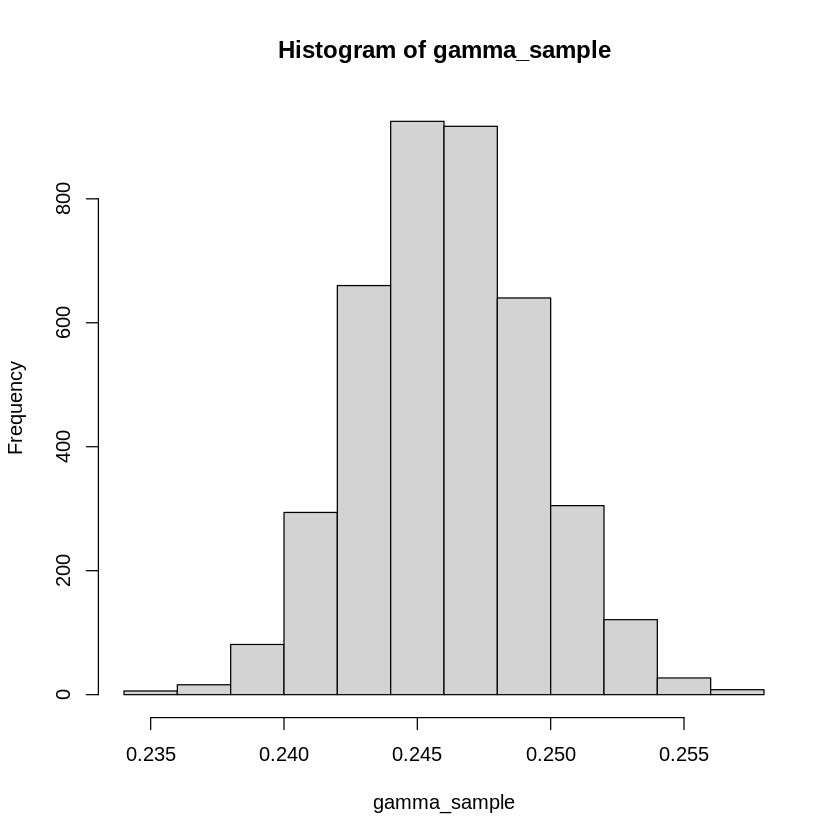

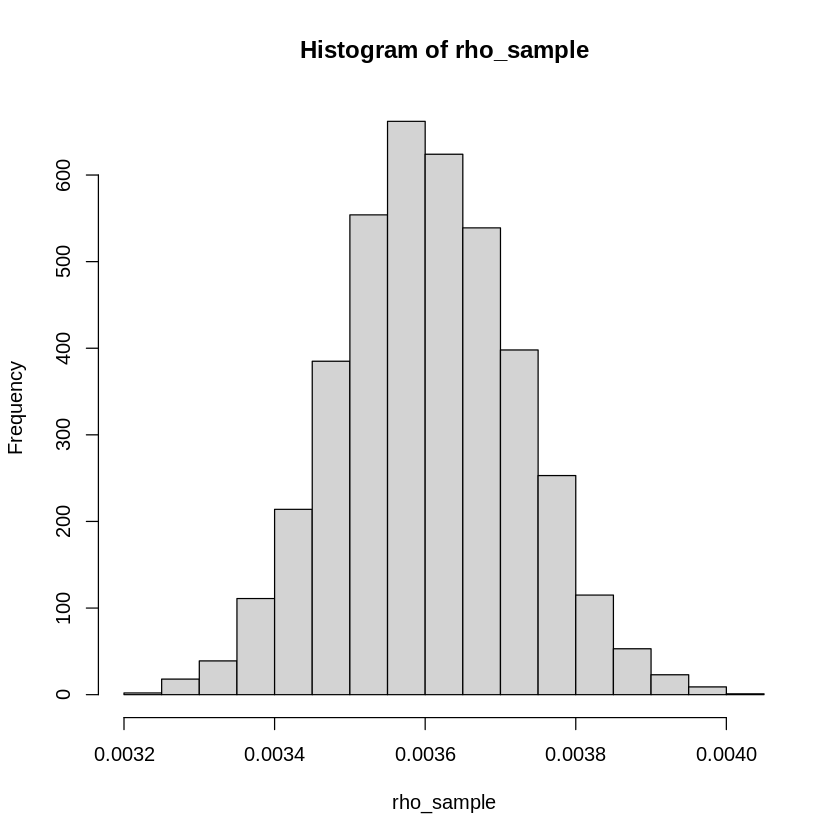

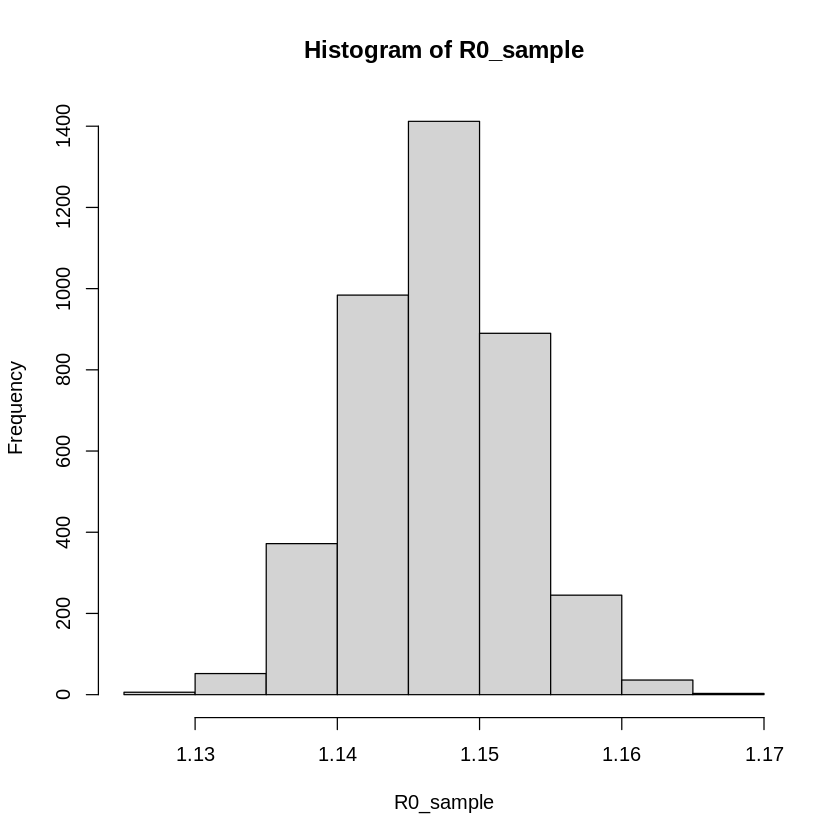

In [ ]:
hist(beta_sample)
hist(gamma_sample)
hist(rho_sample)
hist(R0_sample)
